In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [2]:
# CITY = 'beijing'
CITY = 'shanghai'

In [3]:
host_df = pd.read_csv('data/{}/host.csv'.format(CITY))

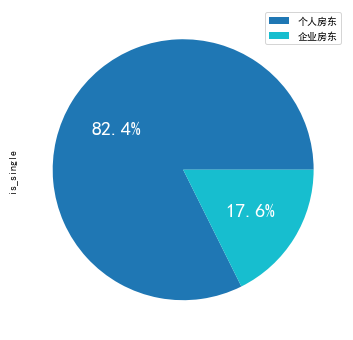

In [4]:
# 房东类型占比
plt.figure(figsize=(6,6))
host_df['is_single'].value_counts().plot.pie(autopct='%.1f%%', pctdistance = 0.6,cmap=plt.get_cmap("tab10"),textprops={'fontsize': 20, 'color': 'w'})
plt.legend(loc='upper right',labels=['个人房东','企业房东'])

In [5]:
host_type_group = host_df.groupby('is_single')

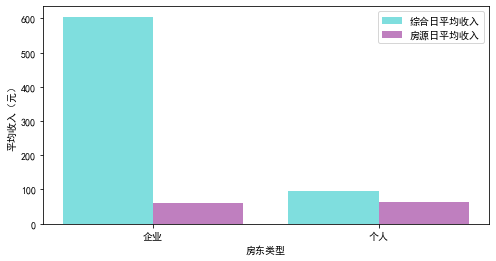

In [6]:
#设置柱状图的宽度
width = 0.4
plt.figure(figsize=(8,4))

x=np.arange(2)
y1 = host_type_group['daily_income'].mean()
plt.bar(x=x,height=y1,width=width,label='综合日平均收入',color='c',alpha=0.5)
y2 = host_type_group['ave_room_income'].mean()
plt.bar(x=x+width,height=y2,width=width,label='房源日平均收入',color='purple',alpha=0.5)

plt.xlabel('房东类型')
plt.ylabel('平均收入（元）')
plt.xticks(ticks=[0.2,1.2],labels=['企业','个人'])
plt.legend()


([<matplotlib.axis.XTick at 0x2ae55b3d550>,
 [Text(0, 0, '超级房东'), Text(1, 0, '普通房东')])

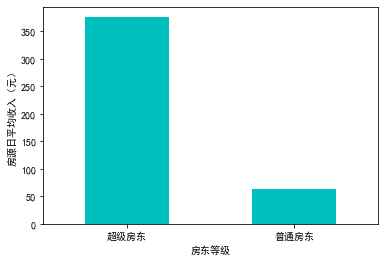

In [7]:
# 不同等级房东收入比较
host_df.groupby('is_best')['ave_room_income'].mean().sort_values(ascending=False).plot.bar(color='c')
plt.xlabel('房东等级')
plt.ylabel('房源日平均收入（元）')
plt.xticks(ticks=[0, 1], labels=['超级房东','普通房东'],rotation=0)

Text(0, 0.5, '房源日平均收入（元）')

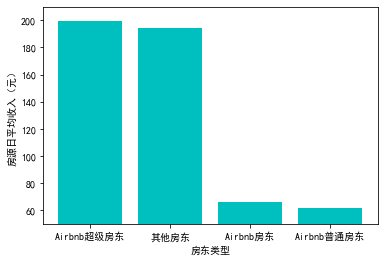

In [8]:
# 不同类型房东收入比较
x=['Airbnb超级房东','其他房东','Airbnb房东','Airbnb普通房东']
y=[199.447409,194.468889,66.34874,62.013945]
plt.ylim(50,210)
plt.bar(x, y,color='c')
plt.xlabel('房东类型')
plt.ylabel('房源日平均收入（元）')

In [9]:
host_df['host_year'] = host_df['host_since'].map(lambda x: datetime.strptime(x,'%Y-%m-%d').year)
host_df = host_df.drop(host_df[host_df['host_year']==2021].index, axis=0)

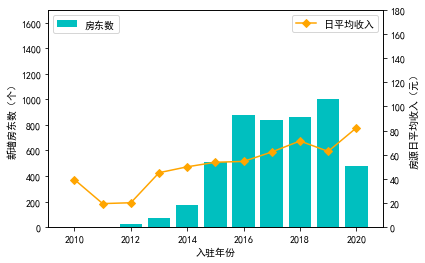

In [10]:
# 除去2021年的房东入驻情况&入驻年份和平均收入的变化
x = sorted(list(host_df['host_year'].unique()))
y1 = host_df.groupby('host_year').count()['host_id'].values.tolist()
y2 = host_df.groupby('host_year')['ave_room_income'].mean().tolist()
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.bar(x, y1,label='房东数',color='c')
ax1.set_ylim([0,1700])
ax1.set_ylabel('新增房东数（个）')
plt.legend(loc=2)
plt.xlabel('入驻年份')
plt.xticks(rotation=0)

ax2 = ax1.twinx()
ax2.plot(x, y2, color='orange',marker='D', label='日平均收入')
ax2.set_ylim([0,180])
ax2.set_ylabel('房源日平均收入（元）')
plt.legend(loc=1)

In [11]:
trans_attr_list =['host_has_profile_pic','host_identity_verified','is_single','is_best']
for attr in trans_attr_list:
    host_df[attr] = host_df[attr].map(lambda x: 1 if x == 't' else 0)

<AxesSubplot:>

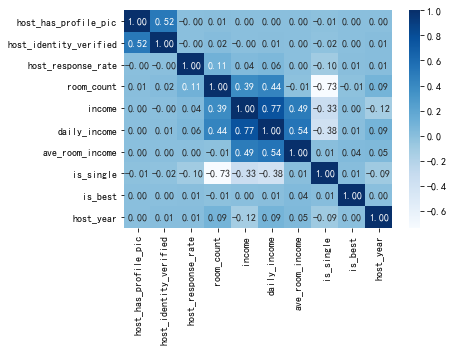

In [12]:
# 房东相关性矩阵
corr = host_df.drop(['host_id'],axis=1).corr()
sns.heatmap(corr, cmap="Blues", annot=True, fmt='.2f')